# EDA for new datasets

## Datasets Used: used_cars, ratings

Attribute Notes:
- used_cars and reviews datasets don't have a VIN column; make up our own id

Data notes:
- most reviews are positive
- join between reviews and used_cars gives 3M rows :)

Easy Query Ideas:
- cars that have a mpg above some range (fuel efficiency -- uses used_cars dataset)
- filter by fuel type (e.g. Hybrid)
- For a (make, model) tuple, what are the reviews?
-- Allow user to sort by best/worst



In [1]:
import pandas as pd
import numpy as np

In [2]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [3]:
used_cars_path = '/content/drive/My Drive/CIS550Datasets/used_cars.csv'
reviews_path = '/content/drive/My Drive/CIS550Datasets/reviews.csv'

In [4]:
uc_df = pd.read_csv(used_cars_path)
reviews_df = pd.read_csv(reviews_path)

In [5]:
uc_df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [6]:
reviews_df.head()

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,acura,ilx,2013,mahowald,08/12/2012,Getting 43 Mpg on daily commute,5,"I love this car.\nGas mileage, suspension, and..."
1,acura,ilx,2013,VIP,07/26/2016,New to me ILX,5,I purchased my 2013 ILX from the dealer used w...
2,acura,ilx,2013,bybchucky,09/14/2013,Excellet Commuter Car,4,I recently purchased a 2013 ILX with the Tech ...
3,acura,ilx,2013,bayareamom,01/26/2015,Peppy Hybrid that Turns Heads,4,We bought our ILX used and have been incredibl...
4,acura,ilx,2013,Kerry Olson,03/26/2016,2013 Acura ILX Hybrid w/ Tech Package,5,In April of 2015 we were in need of another ca...


## Process used cars dataset

In [7]:
uctest = uc_df.copy()

In [8]:
uctest['drivetrain'] = uctest['drivetrain'].str.lower()

In [9]:
uctest['drivetrain'].unique()

array(['front-wheel drive', nan, 'all-wheel drive', 'rear-wheel drive',
       'rwd', 'fwd', 'awd', 'four-wheel drive', 'unknown',
       'front wheel drive', '4wd', '4x4', 'four wheel drive',
       'all wheel drive', 'rear wheel drive',
       'all-wheel drive with locking and limited-slip differential',
       'front-wheel drive with limited-slip differential',
       'rear-wheel drive with limited-slip differential',
       'four-wheel drive with locking and limited-slip differential',
       'all-wheel drive with locking differential',
       'engine: lambda ii 3.8l gdi dohc v6 w/dual cvvt',
       'engine: 2.4l gdi dohc 16v i4 -inc: dual cvvt',
       'engine: 2.4l dohc i4 gdi', 'engine: 1.6l dohc i4 gdi turbo',
       'engine: 1.6l 4-cyl. 16-valve mpi',
       'engine: 2.0l 4-cylinder mpi 16v dohc w/dual cvvt',
       'four-wheel drive with locking differential', '4x2', '2wd'],
      dtype=object)

In [10]:
uctest[uctest['drivetrain'] == '4x2']

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
619697,RAM,1500 Classic Warlock Quad Cab 4x2 6'4' Box,2019,28337.0,V-6 cyl,8 speed automatic,4x2,Regular Unleaded,NaN,Diamond Black Crystal Pearl Coat,Diesel Gray/Black,0.0,1.0,0.0,Chapman Chrysler Jeep,4.3,4.7,143.0,NaN,28985.0
622475,RAM,1500 Classic SLT Crew Cab 4x2 6'4' Box,2021,57842.0,V-8 cyl,8-speed automatic,4x2,Regular Unleaded,NaN,Black,Diesel Gray/Black,1.0,0.0,0.0,Abernethy Chrysler Jeep Dodge,NaN,5.0,10.0,NaN,33900.0


In [16]:
uc_df.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [11]:
uc_cols_map = {
    'manufacturer' : 'Make',
    'model' : 'Model',
    'year' : 'Year',
    'mileage' : 'Mileage',
    'mpg' : 'MPG',
    'price' : 'Price',
    'drivetrain' : 'Drivetrain',
    'fuel_type' : 'Fuel_type',
    'accidents_or_damage': 'Accident',
    'one_owner': 'One_owner'
}
uc_df = uc_df.rename(columns=uc_cols_map)
uc_df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'engine', 'transmission',
       'Drivetrain', 'Fuel_type', 'MPG', 'exterior_color', 'interior_color',
       'Accident', 'One_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'Price'],
      dtype='object')

In [12]:
uc_cols = ['Price', 'Make', 'Model', 'Year', 'Mileage', 'MPG', 'Drivetrain', 'Fuel_type','Accident', 'One_owner']
uc_df = uc_df[uc_cols]
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,13988.0,Acura,ILX Hybrid 1.5L,2013,92945.0,39-38,Front-wheel Drive,Gasoline,0.0,0.0
1,17995.0,Acura,ILX Hybrid 1.5L,2013,47645.0,39-38,Front-wheel Drive,Hybrid,1.0,1.0
2,17000.0,Acura,ILX Hybrid 1.5L,2013,53422.0,39-38,Front-wheel Drive,Hybrid,0.0,1.0
3,14958.0,Acura,ILX Hybrid 1.5L,2013,117598.0,39-38,Front-wheel Drive,Hybrid,0.0,1.0
4,14498.0,Acura,ILX Hybrid 1.5L,2013,114865.0,39-38,Front-wheel Drive,Hybrid,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
762086,34798.0,Volvo,S60 B5 Momentum,2022,22877.0,25-33,All-wheel Drive,Gasoline,0.0,1.0
762087,12500.0,Volvo,S60 T5,2012,72900.0,NaN,Front-wheel Drive,Gasoline,NaN,NaN
762088,12299.0,Volvo,S60 T5,2014,92000.0,21-30,Front-wheel Drive,Gasoline,0.0,0.0
762089,8995.0,Volvo,S60 T5 Platinum,2013,132000.0,20-29,All-wheel Drive,Gasoline,1.0,0.0


In [13]:
# number of null values
uc_df.isnull().any(axis=1).sum()

162015

In [14]:
# Drop nulls
uc_df = uc_df.dropna()
uc_df.shape

(600076, 10)

In [15]:
uc_df.dtypes

Price         float64
Make           object
Model          object
Year            int64
Mileage       float64
MPG            object
Drivetrain     object
Fuel_type      object
Accident      float64
One_owner     float64
dtype: object

In [16]:
uc_df['Year'] = uc_df['Year'].astype(int)
uc_df['Mileage'] = uc_df['Mileage'].astype(int)
uc_df['Price'] = uc_df['Price'].astype(int)
uc_df.dtypes

<ipython-input-16-7cfd4fd9367f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Year'] = uc_df['Year'].astype(int)
<ipython-input-16-7cfd4fd9367f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Mileage'] = uc_df['Mileage'].astype(int)
<ipython-input-16-7cfd4fd9367f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Price           int64
Make           object
Model          object
Year            int64
Mileage         int64
MPG            object
Drivetrain     object
Fuel_type      object
Accident      float64
One_owner     float64
dtype: object

In [17]:
uc_df = uc_df.drop_duplicates()
uc_df.shape

(593415, 10)

In [18]:
uc_df = uc_df.sort_values('Price')
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
735177,1,Volkswagen,Jetta,2007,133964,22-30,Front-wheel Drive,Gasoline,1.0,0.0
5658,1,Acura,TLX V6 A-Spec,2018,49603,20-30,Front-wheel Drive,Gasoline,1.0,0.0
584638,259,Nissan,Versa SV,2021,45288,32-40,Front-wheel Drive,Gasoline,0.0,0.0
195371,289,Ford,EcoSport Titanium,2019,44077,27-29,Front-wheel Drive,Gasoline,1.0,0.0
73551,299,Buick,Encore Essence,2019,115608,0-0,Front-wheel Drive,Gasoline,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
49078,1750000,BMW,750 iL,1996,121043,15-20,Front-wheel Drive,Gasoline,0.0,0.0
613080,1899999,Porsche,Carrera GT,2004,2361,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
609009,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,All-wheel Drive,Hybrid,0.0,0.0
613085,2250000,Porsche,Carrera GT,2005,780,10-16,Rear-wheel Drive,Gasoline,0.0,0.0


In [19]:
uc_makes = uc_df['Make'].unique()
uc_makes

array(['Volkswagen', 'Acura', 'Nissan', 'Ford', 'Buick', 'Dodge',
       'Toyota', 'Chrysler', 'Mitsubishi', 'Volvo', 'Kia', 'Chevrolet',
       'Mazda', 'Lincoln', 'Jeep', 'Jaguar', 'GMC', 'INFINITI',
       'Cadillac', 'BMW', 'Mercedes-Benz', 'Lexus', 'Honda', 'Subaru',
       'Hyundai', 'Audi', 'Land Rover', 'Porsche', 'RAM'], dtype=object)

In [20]:
uc_df = uc_df[uc_df['Price'] < 1000000000]
uc_df.reset_index(inplace=True, drop=True)
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,1,Volkswagen,Jetta,2007,133964,22-30,Front-wheel Drive,Gasoline,1.0,0.0
1,1,Acura,TLX V6 A-Spec,2018,49603,20-30,Front-wheel Drive,Gasoline,1.0,0.0
2,259,Nissan,Versa SV,2021,45288,32-40,Front-wheel Drive,Gasoline,0.0,0.0
3,289,Ford,EcoSport Titanium,2019,44077,27-29,Front-wheel Drive,Gasoline,1.0,0.0
4,299,Buick,Encore Essence,2019,115608,0-0,Front-wheel Drive,Gasoline,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
593409,1650000,Porsche,Carrera GT,2005,9610,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593410,1750000,BMW,750 iL,1996,121043,15-20,Front-wheel Drive,Gasoline,0.0,0.0
593411,1899999,Porsche,Carrera GT,2004,2361,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593412,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,All-wheel Drive,Hybrid,0.0,0.0


In [21]:
uc_df = uc_df[uc_df['Price'] > 1]
uc_df.reset_index(inplace=True, drop=True)
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,259,Nissan,Versa SV,2021,45288,32-40,Front-wheel Drive,Gasoline,0.0,0.0
1,289,Ford,EcoSport Titanium,2019,44077,27-29,Front-wheel Drive,Gasoline,1.0,0.0
2,299,Buick,Encore Essence,2019,115608,0-0,Front-wheel Drive,Gasoline,0.0,1.0
3,299,Nissan,Murano SV,2018,120524,21-28,All-wheel Drive,Gasoline,0.0,0.0
4,299,Buick,Enclave Premium,2017,115869,15-22,Front-wheel Drive,Gasoline,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
593407,1650000,Porsche,Carrera GT,2005,9610,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593408,1750000,BMW,750 iL,1996,121043,15-20,Front-wheel Drive,Gasoline,0.0,0.0
593409,1899999,Porsche,Carrera GT,2004,2361,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593410,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,All-wheel Drive,Hybrid,0.0,0.0


<Axes: >

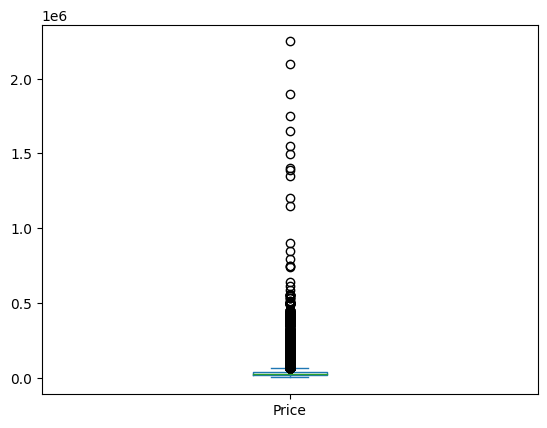

In [22]:
uc_df['Price'].plot(kind='box')

In [23]:
uc_df[uc_df['Mileage'] == uc_df['Mileage'].max()]

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
117335,16997,Volvo,XC70 3.2L,2010,1119067,16-22,All-wheel Drive,Gasoline,0.0,0.0


<Axes: >

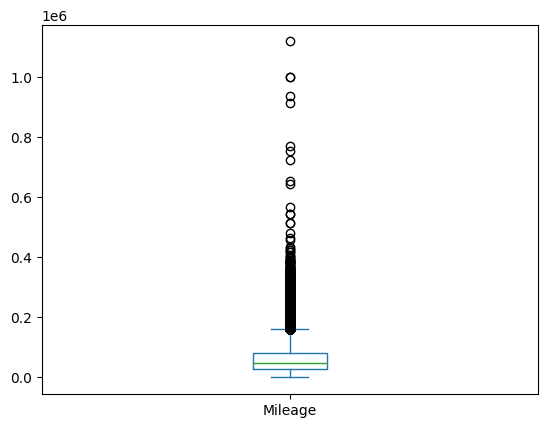

In [24]:
uc_df['Mileage'].plot(kind='box')

<Axes: ylabel='Frequency'>

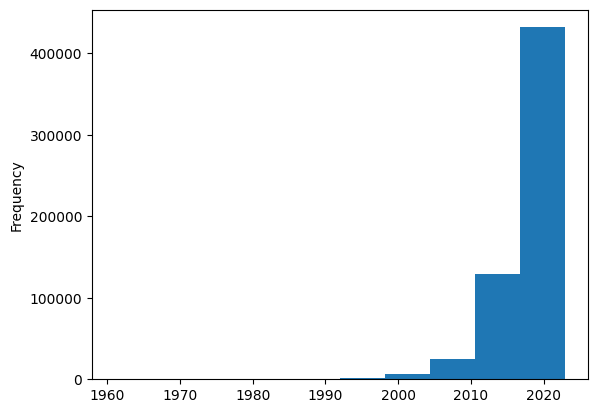

In [25]:
uc_df['Year'].plot(kind='hist')

In [26]:
uc_df['Make'] = uc_df['Make'].str.lower()
uc_df['Model'] = uc_df['Model'].str.lower()
uc_df

<ipython-input-26-ec757c168fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Make'] = uc_df['Make'].str.lower()
<ipython-input-26-ec757c168fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Model'] = uc_df['Model'].str.lower()


,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,259,nissan,versa sv,2021,45288,32-40,Front-wheel Drive,Gasoline,0.0,0.0
1,289,ford,ecosport titanium,2019,44077,27-29,Front-wheel Drive,Gasoline,1.0,0.0
2,299,buick,encore essence,2019,115608,0-0,Front-wheel Drive,Gasoline,0.0,1.0
3,299,nissan,murano sv,2018,120524,21-28,All-wheel Drive,Gasoline,0.0,0.0
4,299,buick,enclave premium,2017,115869,15-22,Front-wheel Drive,Gasoline,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
593407,1650000,porsche,carrera gt,2005,9610,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593408,1750000,bmw,750 il,1996,121043,15-20,Front-wheel Drive,Gasoline,0.0,0.0
593409,1899999,porsche,carrera gt,2004,2361,10-16,Rear-wheel Drive,Gasoline,0.0,0.0
593410,2099995,porsche,918 spyder base (pdk),2015,2622,20-24,All-wheel Drive,Hybrid,0.0,0.0


In [27]:
uc_df['Make'].nunique()

29

In [28]:
def calculate_avg(mpg):
    if '-' in mpg:
        low, high = map(float, mpg.split('-'))
        return (low + high) / 2
    else:
        return float(mpg)

# Apply the function to the MPG column
uc_df['MPG'] = uc_df['MPG'].apply(calculate_avg)


<ipython-input-28-0d0ca67c8ff0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['MPG'] = uc_df['MPG'].apply(calculate_avg)


In [29]:
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,259,nissan,versa sv,2021,45288,36.0,Front-wheel Drive,Gasoline,0.0,0.0
1,289,ford,ecosport titanium,2019,44077,28.0,Front-wheel Drive,Gasoline,1.0,0.0
2,299,buick,encore essence,2019,115608,0.0,Front-wheel Drive,Gasoline,0.0,1.0
3,299,nissan,murano sv,2018,120524,24.5,All-wheel Drive,Gasoline,0.0,0.0
4,299,buick,enclave premium,2017,115869,18.5,Front-wheel Drive,Gasoline,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
593407,1650000,porsche,carrera gt,2005,9610,13.0,Rear-wheel Drive,Gasoline,0.0,0.0
593408,1750000,bmw,750 il,1996,121043,17.5,Front-wheel Drive,Gasoline,0.0,0.0
593409,1899999,porsche,carrera gt,2004,2361,13.0,Rear-wheel Drive,Gasoline,0.0,0.0
593410,2099995,porsche,918 spyder base (pdk),2015,2622,22.0,All-wheel Drive,Hybrid,0.0,0.0


In [31]:
uc_df['Drivetrain'].unique()

array(['Front-wheel Drive', 'All-wheel Drive', 'Four-wheel Drive',
       'Rear-wheel Drive', '4WD', 'FWD', 'AWD', 'RWD',
       'Front Wheel Drive', 'Unknown', 'All Wheel Drive', '4X4',
       'Four Wheel Drive'], dtype=object)

In [34]:
uc_df = uc_df[uc_df['Drivetrain'] != 'Unknown']

In [35]:
uc_df.reset_index(drop=True, inplace=True)
uc_df

,Price,Make,Model,Year,Mileage,MPG,Drivetrain,Fuel_type,Accident,One_owner
0,259,nissan,versa sv,2021,45288,36.0,Front-wheel Drive,Gasoline,0.0,0.0
1,289,ford,ecosport titanium,2019,44077,28.0,Front-wheel Drive,Gasoline,1.0,0.0
2,299,buick,encore essence,2019,115608,0.0,Front-wheel Drive,Gasoline,0.0,1.0
3,299,nissan,murano sv,2018,120524,24.5,All-wheel Drive,Gasoline,0.0,0.0
4,299,buick,enclave premium,2017,115869,18.5,Front-wheel Drive,Gasoline,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
593373,1650000,porsche,carrera gt,2005,9610,13.0,Rear-wheel Drive,Gasoline,0.0,0.0
593374,1750000,bmw,750 il,1996,121043,17.5,Front-wheel Drive,Gasoline,0.0,0.0
593375,1899999,porsche,carrera gt,2004,2361,13.0,Rear-wheel Drive,Gasoline,0.0,0.0
593376,2099995,porsche,918 spyder base (pdk),2015,2622,22.0,All-wheel Drive,Hybrid,0.0,0.0


In [36]:
drivetrain_mapping = {
    'Front-wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'FWD': 'FWD',
    'All-wheel Drive': 'AWD',
    'All Wheel Drive': 'AWD',
    'AWD': 'AWD',
    'Four-wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    '4WD': '4WD',
    '4X4': '4WD',
    'Rear-wheel Drive': 'RWD',
    'RWD': 'RWD'
}
uc_df['Drivetrain'] = uc_df['Drivetrain'].map(drivetrain_mapping)

<ipython-input-36-43a6d7ea6803>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Drivetrain'] = uc_df['Drivetrain'].map(drivetrain_mapping)


In [39]:
uc_df['Fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Flexible Fuel', 'Diesel',
       'Regular Unleaded', 'E85 Fl', 'Compressed Natural Gas',
       'Gasoline/Mild Electric Hybrid', 'Automatic', 'Other',
       'Premium (Required)', 'Gasoline Fuel', 'Premium', 'Gaseous',
       'Plug-In Hybrid', 'Hydrogen Fuel Cell', 'Bio Diesel',
       'Natural Gas', 'Biodiesel'], dtype=object)

In [58]:
fuel_type_mapping = {
    'Gasoline': 'Gasoline',
    'E85 Flex Fuel': 'Ethanol',
    'Hybrid': 'Hybrid',
    'Flexible Fuel': 'Ethanol',
    'Diesel': 'Diesel',
    'Regular Unleaded': 'Gasoline',
    'E85 Fl': 'Ethanol',
    'Compressed Natural Gas': 'Natural Gas',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    'Automatic': 'Gasoline',
    'Other': 'Gasoline',
    'Premium (Required)': 'Gasoline',
    'Gasoline Fuel': 'Gasoline',
    'Premium': 'Gasoline',
    'Gaseous': 'Natural Gas',
    'Plug-In Hybrid': 'Hybrid',
    'Hydrogen Fuel Cell': 'Hydrogen',
    'Bio Diesel': 'Biodiesel',
    'Natural Gas': 'Natural Gas',
    'Biodiesel': 'Biodiesel'
}


In [59]:
uc_df['Fuel_type'] = uc_df['Fuel_type'].map(fuel_type_mapping)

<ipython-input-59-f603ad1b5035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Fuel_type'] = uc_df['Fuel_type'].map(fuel_type_mapping)


In [63]:
uc_df.dtypes

Price           int64
Make           object
Model          object
Year            int64
Mileage         int64
MPG           float64
Drivetrain     object
Fuel_type      object
Accident      float64
One_owner     float64
dtype: object

## Reviews dataset

In [ ]:
reviews_df.columns

Index(['Company', 'Model', 'Year', 'Reviewer', 'Date', 'Title', 'Rating',
       'Review'],
      dtype='object')

In [ ]:
reviews_df

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,acura,ilx,2013,mahowald,08/12/2012,Getting 43 Mpg on daily commute,5,"I love this car.\nGas mileage, suspension, and..."
1,acura,ilx,2013,VIP,07/26/2016,New to me ILX,5,I purchased my 2013 ILX from the dealer used w...
2,acura,ilx,2013,bybchucky,09/14/2013,Excellet Commuter Car,4,I recently purchased a 2013 ILX with the Tech ...
3,acura,ilx,2013,bayareamom,01/26/2015,Peppy Hybrid that Turns Heads,4,We bought our ILX used and have been incredibl...
4,acura,ilx,2013,Kerry Olson,03/26/2016,2013 Acura ILX Hybrid w/ Tech Package,5,In April of 2015 we were in need of another ca...
...,...,...,...,...,...,...,...,...
299040,volvo,xc70,2016,FirstVolvo,03/18/2017,Safety First,5,Except for the fact that this unit must have s...
299041,volvo,xc70,2016,Dhp,01/26/2016,Best Volvo Yet,5,Professional review was correct - crossover su...
299042,volvo,xc70,2016,Lisa B,05/03/2016,I love this car!! I own a 2006 and 16!,5,"This car is comfy, rides like a dream, has gre..."
299043,volvo,xc70,2016,Milan,05/04/2019,Couldn't resist,5,When I drove my sister's 2002 XC70 last year I...


In [ ]:
reviews_cols_map = {
    'Company' : 'Make'
}
reviews_df = reviews_df.rename(columns=reviews_cols_map)
reviews_df.columns

Index(['Make', 'Model', 'Year', 'Reviewer', 'Date', 'Title', 'Rating',
       'Review'],
      dtype='object')

In [ ]:
reviews_df['Make'] = reviews_df['Make'].str.lower()
reviews_df['Model'] = reviews_df['Model'].str.lower()

In [ ]:
reviews_df.dtypes

Make        object
Model       object
Year         int64
Reviewer    object
Date        object
Title       object
Rating       int64
Review      object
dtype: object

In [ ]:
reviews_df = reviews_df.sort_values('Rating')
reviews_df.reset_index(inplace=True, drop=True)

In [ ]:
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
299040,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
299041,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
299042,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
299043,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


<Axes: >

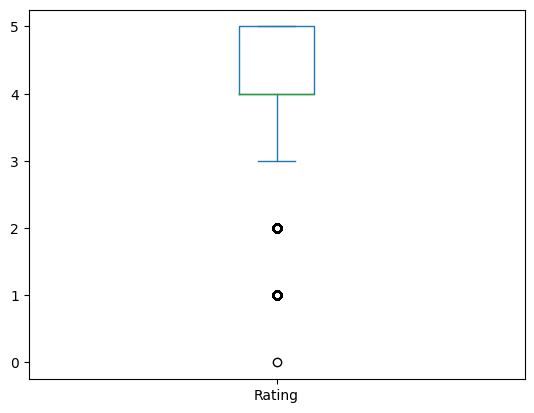

In [ ]:
reviews_df['Rating'].plot(kind='box')

In [ ]:
# number of ratings below 3: around 28,000
reviews_df[reviews_df['Rating'] < 3]

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,ford,taurus,2003,dtskiles,05/15/2003,"Too much money, too little car",1,1. A car should have pickup or gas \nmileage. ...
2,ford,escape,2013,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...
3,infiniti,qx,2013,Sabrina,02/01/2017,Could be a lean mean driving machine,1,"Be carful of what gas An gas stations you use,..."
4,ford,escape,2015,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...
...,...,...,...,...,...,...,...,...
28524,honda,civic,2010,Dan Sylvia,07/14/2015,[non-permissible content removed],2,This car I got a good deal on getting for abou...
28525,bmw,x6,2008,MrObjective,09/24/2008,Flashy headache,2,"Sure, it gets attention, but I wish more atten..."
28526,honda,civic,2010,dabatangelo,07/14/2014,Don't Buy,2,I've had my hybrid for 4 years.\nIt gets about...
28527,jeep,grand-cherokee,2005,Cristi,01/16/2007,2005 Jeep Cherokee,2,We have had nothing but continuing problems wi...


In [ ]:
reviews_df[reviews_df['Rating'] == 3]

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
46644,chevrolet,silverado-1500,2006,jwarren,03/31/2008,Major Dissapointment,3,Bought the Silverado new in June of 06. Since ...
149596,jaguar,xf,2009,UW HUSKY FAN,02/17/2010,BEWARE!!! The car gets stuck in gear!!!,3,OK...I have been very impressed with my Jaguar...
146729,infiniti,jx,2013,2002blksle,11/28/2012,Living with the JX,3,Traded an 08 CX-9 for the JX.\nThe Mazda handl...
186716,mazda,6,2005,Stuart Summers,07/06/2006,Zoom Zoom Ping Knock Clunk,3,Poor performance and reliability. New 6 speed...
103420,ford,focus,2010,mdmiddleton,08/12/2014,Love my '10 SE,3,I know car magazines love to hate this car but...
...,...,...,...,...,...,...,...,...
34376,cadillac,srx,2005,dave,06/06/2009,oil and water,3,"i really like the car, but like someone else c..."
41657,chevrolet,equinox,2020,Harold,08/22/2020,Terrible front seat comfort,3,Sorry to say this is the most uncomfortable ve...
199312,mercedes-benz,e-class,2019,Driving it because I have to,09/08/2019,Underwhelmed,3,My E450 wagon looks nice. It is so overly com...
5737,acura,tl,2003,cwms97,04/24/2010,Big disappointment,3,I bought my 2003 Acura TL-S in 2006 with about...


<Axes: ylabel='Frequency'>

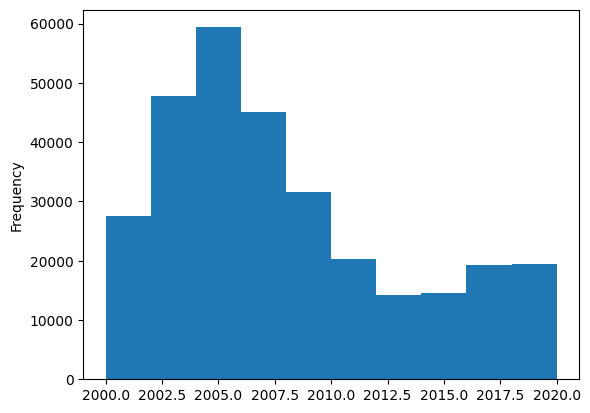

In [ ]:
reviews_df['Year'].plot(kind='hist')

In [ ]:
reviews_df.duplicated().sum()

310

In [ ]:
reviews_df = reviews_df.drop_duplicates()

In [ ]:
reviews_df.reset_index(inplace=True, drop=True)
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
298730,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
298731,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
298732,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
298733,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


In [ ]:
reviews_df = reviews_df.dropna()

## Joins between datasets
### Reviews and Used Cars

In [ ]:
reviews_of_uc = reviews_df.merge(uc_df, how='inner', on=['Make', 'Model'])

In [ ]:
reviews_of_uc

,Make,Model,Year_x,Reviewer,Date,Title,Rating,Review,Price,Year_y,Mileage,MPG,Accident,One_owner
0,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,3595,2002,130129,19-25,0.0,0.0
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,7981,2010,118231,18-25,0.0,0.0
2,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,9998,2005,80729,26,0.0,1.0
3,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,12495,2015,104827,24-31,0.0,0.0
4,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,12875,2011,182040,18-25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264198,bmw,m2,2017,jc,03/07/2018,BMW M2 review,5,The DCT allows a good mpg. Still we can enjoy ...,51495,2018,20477,18-26,0.0,1.0
3264199,bmw,m2,2017,Rich,10/09/2020,Fabulous M2,5,I've had to modify previous sports cars to get...,51495,2018,20477,18-26,0.0,1.0
3264200,bmw,m2,2018,Anthony,07/23/2019,I just love ❤️ my M2,5,"This is a very special car, it’s more old scho...",51495,2018,20477,18-26,0.0,1.0
3264201,bmw,m2,2020,Chuck,09/27/2020,Spicy Enchilada of a Car,5,I've owned all sorts of sports cars. Literally...,51495,2018,20477,18-26,0.0,1.0


In [ ]:
reviews_of_uc = reviews_of_uc.drop(['Year_x', 'Year_y'], axis=1)
reviews_of_uc

,Make,Model,Reviewer,Date,Title,Rating,Review,Price,Mileage,Engine,MPG
0,ford,escape,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
1,ford,escape,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
2,ford,escape,Najim Amini,10/05/2019,Piece of Junk,1,"Don't make a mistake to buy this car, When I b...",30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
3,ford,escape,Lisa,10/10/2019,Worst vehicle I’ve ever owned!,1,This was my first new car. Drove it right off ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
4,ford,escape,DB,03/23/2017,Not happy with my 2013 Escape,1,What can I say but I'm very disappointed with ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
...,...,...,...,...,...,...,...,...,...,...,...
3386693,lincoln,blackwood,TC,07/06/2009,All I need,5,"Big, roomy, dependable, attention grabber, etc...",27995,85584,5.4L V8 32V MPFI DOHC,12-17
3386694,lincoln,blackwood,Truck Man,04/30/2002,Sport Utility With The Ultimate Luxurys,5,"First off, the Lincoln Blackwood is NOT \na tr...",24995,42535,5.4L V8 32V MPFI DOHC,12-17
3386695,lincoln,blackwood,Truck Man,04/30/2002,Sport Utility With The Ultimate Luxurys,5,"First off, the Lincoln Blackwood is NOT \na tr...",27995,85584,5.4L V8 32V MPFI DOHC,12-17
3386696,lincoln,blackwood,Donnie Tate,04/19/2006,Very pleased owner,5,I bought my Blackwod in June 0f 2002 and it wa...,24995,42535,5.4L V8 32V MPFI DOHC,12-17


In [ ]:
# Count of duplicates, really shouldn't be any
reviews_of_uc.duplicated().sum()

189

<Axes: xlabel='Make'>

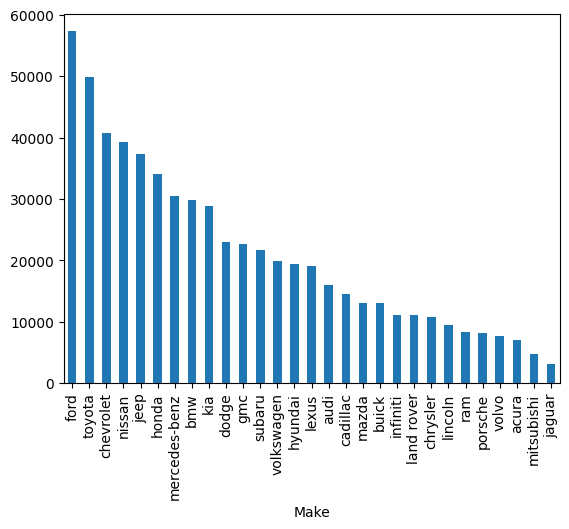

In [ ]:
uc_df['Make'].value_counts().plot(kind='bar')

In [ ]:
reviews_df.reset_index(drop=True, inplace=True)
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
298566,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
298567,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
298568,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
298569,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


In [64]:
uc_df.to_csv('used_cars.csv')

In [66]:
from google.colab import files
files.download('used_cars.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reviews_df.to_csv('reviews.csv')
files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>